# Make Features 

- Student should be able to understand the purpose of feature engineering
- Student should be able to work with strings in pandas
- Student should be able to work with dates and times in pandas
- Student should be able to modify or create columns of a dataframe using the `.apply()` function


Helpful Links:
- [Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series
- [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)

In [298]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb

# Loading the dataset
df_housing = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

# Set some display options so we can see more
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [299]:
# Tak e a peek at the head and tail

df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [300]:
df_housing.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [301]:
# What kind of data are we dealing with
print(df_housing.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [302]:
# So, I know that we need to make sure that pandas infered correclty; that is
# assigned the correct datatype to the values stored in the row, but in this
# case, we already knew wher ethe problem was because the instructor told us
# but how do we search the dataframe and find them ouselves? We can read the
# data dictonary, deciding which type of data should be in each column, and 
# then loop through the dataframe and detect bad values. Because of time, I 
# will stick with what I know about this DataFrame

In [303]:
df_housing.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [304]:
# I understand that Pandas casts NaN as floats (.0) and that Pandas wants
# each column to be of the same data type, so I will get the value counts
# of 'LotFrontage'

In [305]:
df_housing['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
40.0      12
76.0      11
69.0      11
53.0      10
92.0      10
88.0      10
34.0      10
86.0      10
77.0       9
35.0       9
44.0       9
84.0       9
62.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
95.0       7
120.0      7
58.0       7
41.0       6
105.0      6
54.0       6
94.0       6
48.0       6
110.0      6
30.0       6
89.0       6
81.0       6
91.0       6
36.0       6
47.0       5
83.0       5
37.0       5
87.0       5
32.0       5
56.0       5
102.0      4
42.0       4
49.0       4
99.0       3
45.0       3
104.0      3
130.0      3
103.0      3
108.0      3

In [306]:
# I can tell you that this particular column is suppose to be int
# but pandas cast it as float because of the NaN values. Moving on,
# as NaN MAY BE APPLICABLE TO HOMES WITHOUT BEDROOMS.


In [307]:
# An example of subsetting a DataFrame

teenyweenydataframe = df_housing[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']]

# Look at the head
teenyweenydataframe.head(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
0,856,856,854,208500
1,1262,1262,0,181500
2,920,920,866,223500
3,756,961,756,140000
4,1145,1145,1053,250000


In [308]:
# Look at the tail
teenyweenydataframe.tail(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
1455,953,953,694,175000
1456,1542,2073,0,210000
1457,1152,1188,1152,266500
1458,1078,1078,0,142125
1459,1256,1256,0,147500


In [309]:
# Creating a column that calculates the total square footage

teenyweenydataframe['TotalSquareFootage'] = teenyweenydataframe['TotalBsmtSF'] + teenyweenydataframe['1stFlrSF'] + teenyweenydataframe['2ndFlrSF']

teenyweenydataframe.head(5)

<ipython-input-309-6a437e567d1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teenyweenydataframe['TotalSquareFootage'] = teenyweenydataframe['TotalBsmtSF'] + teenyweenydataframe['1stFlrSF'] + teenyweenydataframe['2ndFlrSF']


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [310]:
# Create a column that takes the total square feet colume we create before
# and create a column that calculates the price per square feet

teenyweenydataframe["PricePerSqFt"] = round(teenyweenydataframe['SalePrice'] / teenyweenydataframe['TotalSquareFootage'], 2)

teenyweenydataframe.head(5)

<ipython-input-310-6142b041148b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teenyweenydataframe["PricePerSqFt"] = round(teenyweenydataframe['SalePrice'] / teenyweenydataframe['TotalSquareFootage'], 2)


,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
0,856,856,854,208500,2566,81.25
1,1262,1262,0,181500,2524,71.91
2,920,920,866,223500,2706,82.59
3,756,961,756,140000,2473,56.61
4,1145,1145,1053,250000,3343,74.78


In [311]:
# Lets look at teh summary statistics to get a better picture
teenyweenydataframe.describe()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSquareFootage,PricePerSqFt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1057.429452,1162.626712,346.992466,180921.195890,2567.048630,69.944116
std,438.705324,386.587738,436.528436,79442.502883,821.714421,15.397123
min,0.000000,334.000000,0.000000,34900.000000,334.000000,13.610000
25%,795.750000,882.000000,0.000000,129975.000000,2009.500000,60.465000
50%,991.500000,1087.000000,0.000000,163000.000000,2474.000000,69.680000
75%,1298.250000,1391.250000,728.000000,214000.000000,3004.000000,78.952500
max,6110.000000,4692.000000,2065.000000,755000.000000,11752.000000,138.130000


In [312]:
# Lets create a even smaller dataframe with just SalePrice and PricePerSqFt

smaller_df = teenyweenydataframe[['SalePrice','PricePerSqFt']]

In [313]:
smaller_df.head(10)

,SalePrice,PricePerSqFt
0,208500,81.25
1,181500,71.91
2,223500,82.59
3,140000,56.61
4,250000,74.78
5,143000,66.27
6,307000,90.83
7,200000,62.56
8,129900,47.65
9,118000,57.06


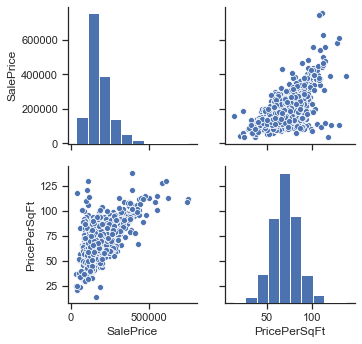

In [314]:
# How does SalePrice relate to PricePerSqFt, looking through different charts
# to see which ones better meets the needs

sb.set(style="ticks", color_codes=True)
plots = sb.pairplot(smaller_df)


In [315]:
# I can see a linear relationship between slaes price and price per square foot (obviously). 


In [316]:
smaller_df.describe()

,SalePrice,PricePerSqFt
count,1460.000000,1460.000000
mean,180921.195890,69.944116
std,79442.502883,15.397123
min,34900.000000,13.610000
25%,129975.000000,60.465000
50%,163000.000000,69.680000
75%,214000.000000,78.952500
max,755000.000000,138.130000


In [317]:
# Price per square foot tells us something abot the estimated value of the home
# I am sure there is other things that it tells us that Price or square footage
# alone does not. I cannot exactly vizualise what that is, but it is a useful 
# calculation for comparing similar properties

# [Objective](#work-with-strings) Work with Strings with Pandas

## Overview

So far we have worked with numeric datatypes (ints and floats) but we haven't worked with any columns containing string values. We can't simply use arithmetic to manipulate string values, so we'll need to learn some more techniques in order to work with this datatype.

## Follow Along

We're going to import a new dataset here to work with. This dataset is from LendingClub and holds information about loans issued in Q4 of 2018. This dataset is a bit messy so it will give us plenty of opportunities to clean up existing columns as well as create new ones.

The `!wget` shell command being used here does exactly the same thing that your browser does when you type a URL in the address. It makes a request or "gets" the file at that address. However, in our case the file isn't a webpage, it's a compressed CSV file. 

Try copying and pasting the URL from below into your browser, did it start an automatic download? Any URLs like this that start automatic downloads when navigated to can be used along with the `!wget` command to bring files directly into your notebook's memory.

In [318]:
# ***********
# UPOADED TO MY CDN, GITHUB WOULD NOT ALLOW THE PUSH FOR THE CSV
# **********
edgeurl = 'https://cdn.scurlock.me/StStats_2018Q4.csv'

# Getting the Loan Stats dataset
#!curl -O https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

In [319]:
!ls

LS_DS_112_Make_Features.ipynb
LS_DS_112_Make_Features_Assignment.ipynb
LoanStats_2018Q4.csv


In [320]:
# Unzip it
#!unzip LoanStats_2018Q4.csv.zip

In [321]:
#!head LoanStats_2018Q4.csv

In [322]:
#!tail LoanStats_2018Q4.csv

In [323]:
# Load the CSV into a DataFrame
df_loans = pd.read_csv(edgeurl)



In [324]:
# Look at the shape
print(df_loans.shape)


(128400, 1)


In [325]:
# Peek at the head and tail
df_loans.head(5)

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title           emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt     total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       6000      6000        6000             36 months  14.47%  206.44      C     C2        Manager             10+ years  RENT           55000      Verified            Dec-2018 Charged Off n          NaN NaN  credit_card        Credit card refinancing 104xx    NY         10.65 0           Jun-2006         0              NaN                    NaN                    6        0       4196      91.2%      8         w                   0.00      0.00          1106.52         1106.52         546.14          272.38        0.0                288.0      51.84                   Apr-2019     206.44          NaN          Nov-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            12514       0           2           1           1           9                  8318         74      1           1           2807       79       4600             1      0           2            2                    2086        344            92      0                        0           33                 150                  9                     9              0        9                    NaN                      9                     NaN                            0                     3              4               3           3         3         4             5             4                   6        0                0            0                  2                  100            100        

In [326]:
df_loans.tail(5)

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   3291.41 3291.41 2373.85 2373.85 1708.59 665.26  0.0 0.0 0.0 Dec-2019 169.83 Jan-2020 Nov-2019 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   6497.81 6335.37 4572.16 4457.86 3502.19 1069.97 0.0 0.0 0.0 Dec-2019 327.68 Jan-2020 Nov-2019 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   6695.63 6695.63 4975.73 4975.73 3304.37 1671.36 0.0 0.0 0.0 Dec-2019 356.08 Jan-2020 Nov-2019 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050652925 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820081797  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [327]:
# Allthough I do not completely understand HOW this works, fixing
# by loading the dataframe using headers = 1

df_loans = pd.read_csv('LoanStats_2018Q4.csv', header=1)

In [328]:
# Looking at the first few now
df_loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000.0,6000.0,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0.0,Jun-2006,0.0,NaN,NaN,6.0,0.0,4196.0,91.2%,8.0,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,51.84,Apr-2019,206.44,NaN,Nov-2019,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,12514.0,0.0,2.0,1.0,1.0,9.0,8318.0,74.0,1.0,1.0,2807.0,79.0,4600.0,1.0,0.0,2.0,2.0,2086.0,344.0,92.0,0.0,0.0,33.0,150.0,9.0,9.0,0.0,9.0,NaN,9.0,NaN,0.0,3.0,4.0,3.0,3.0,3.0,4.0,5.0,4.0,6.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,15800.0,12514.0,4300.0,11200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000.0,24000.0,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0.0,Oct-1996,3.0,39.0,NaN,14.0,0.0,8547.0,27.7%,28.0,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,0.00,Dec-2019,778.14,Jan-2020,Nov-2019,0.0,57.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,273876.0,3.0,5.0,3.0,5.0,5.0,40384.0,66.0,2.0,4.0,4368.0,51.0,30900.0,8.0,0.0,8.0,9.0,19563.0,17353.0,33.0,0.0,0.0,266.0,178.0,4.0,4.0,3.0,4.0,39.0,1.0,39.0,1.0,5.0,5.0,6.0,8.0,15.0,7.0,9.0,5.0,14.0,0.0,0.0,0.0,5.0,82.1,16.7,0.0,0.0,335121.0,50686.0,25900.0,61514.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000.0,30000.0,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consoli

In [329]:
pd.set_option('display.max_rows', 200)

# Checking nulls, and sorting

df_loans.isnull().sum().sort_values()

inq_fi                                             2
delinq_amnt                                        2
chargeoff_within_12_mths                           2
acc_open_past_24mths                               2
inq_last_12m                                       2
total_cu_tl                                        2
total_rev_hi_lim                                   2
max_bal_bc                                         2
open_rv_24m                                        2
open_rv_12m                                        2
total_bal_il                                       2
open_il_24m                                        2
hardship_flag                                      2
open_act_il                                        2
open_acc_6m                                        2
tot_cur_bal                                        2
tot_coll_amt                                       2
acc_now_delinq                                     2
application_type                              

In [330]:
# Correcting the extra NaN's by excluding the footer, needs explanation
# because i am not sure why this works



In [331]:
df_loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')


In [332]:
# Looking at the shape and the first few values
df_loans.shape
df_loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,51.84,Apr-2019,206.44,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,12514,0,2,1,1,9.0,8318,74.0,1,1,2807,79.0,4600,1,0,2,2,2086.0,344.0,92.0,0,0,33.0,150,9,9,0,9.0,NaN,9.0,NaN,0,3,4,3,3,3,4,5,4,6,0.0,0,0,2,100.0,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,NaN,NaN,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,0.00,Dec-2019,778.14,Jan-2020,Nov-2019,0,57.0,1,Individual,NaN,NaN,NaN,0,0,273876,3,5,3,5,5.0,40384,66.0,2,4,4368,51.0,30900,8,0,8,9,19563.0,17353.0,33.0,0,0,266.0,178,4,4,3,4.0,39.0,1.0,39.0,1,5,5,6,8,15,7,9,5,14,0.0,0,0,5,82.1,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,0.00,Feb-2019,28382.51,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,

In [333]:
# Checking nulls again
df_loans.isnull().sum().sort_values()

inq_fi                                             0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
total_cu_tl                                        0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
open_il_24m                                        0
hardship_flag                                      0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                     0
application_type                              

In [334]:
# I can see the change in the columns that had 2 NaN's
# Dropping columns that are nothing but Nan'S

In [335]:
df_loans = df_loans.drop(['id','member_id', 'url', 'desc'], axis=1)

In [336]:
# Taking another look
df_loans.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,51.84,Apr-2019,206.44,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,12514,0,2,1,1,9.0,8318,74.0,1,1,2807,79.0,4600,1,0,2,2,2086.0,344.0,92.0,0,0,33.0,150,9,9,0,9.0,NaN,9.0,NaN,0,3,4,3,3,3,4,5,4,6,0.0,0,0,2,100.0,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,0.00,Dec-2019,778.14,Jan-2020,Nov-2019,0,57.0,1,Individual,NaN,NaN,NaN,0,0,273876,3,5,3,5,5.0,40384,66.0,2,4,4368,51.0,30900,8,0,8,9,19563.0,17353.0,33.0,0,0,266.0,178,4,4,3,4.0,39.0,1.0,39.0,1,5,5,6,8,15,7,9,5,14,0.0,0,0,5,82.1,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,0.00,Feb-2019,28382.51,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,51370,1,2,1,2,9.0,25616,71.0,2,3,9621,57.0,53600,0,2,1,5,6421.0,22030.

In [337]:
# While int_rate is suppose to represents a numeric value, it is a string
# to pandas because of certian characters present. Namely the % symbol. 
df_loans.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [338]:
# I see that int rate is an object, but we want iot to be a float
# so we can use it in matematical computations. If I look at int_rate

In [339]:
df_loans['int_rate'].head(50)

0      14.47%
1      10.33%
2      15.02%
3      12.98%
4      16.14%
5      12.98%
6      15.02%
7      16.14%
8      14.47%
9      13.56%
10     18.94%
11     11.80%
12     23.40%
13     17.97%
14     19.92%
15     17.97%
16     26.31%
17     14.47%
18     23.40%
19     23.40%
20     20.89%
21     14.47%
22     26.31%
23     14.47%
24     16.14%
25     16.14%
26     12.98%
27     10.72%
28     23.40%
29     19.92%
30     10.33%
31     15.02%
32     17.97%
33     18.94%
34     11.31%
35     14.47%
36     17.97%
37     16.14%
38     16.14%
39     17.97%
40     12.98%
41     23.40%
42      6.46%
43     10.33%
44     10.33%
45     14.47%
46     27.27%
47     16.91%
48     15.02%
49     12.98%
Name: int_rate, dtype: object

In [340]:
# The instructor told us where to look for the whitespace and the %,
# but what do we do if we do not know, and we need to find non-numeric
# characters?


In [341]:
# Function: takes a df column and ourput column name as input
# Strips whitespaces, and %
# Converts it to a decimal
# Returns a new cleaned df 



def stripit(thecolumn):
         
    tmp = []
    
    for c in thecolumn:
        
        stripitfloated = float(c.strip().strip('%')) / 100
        
        tmp.append(stripitfloated)
                
    return pd.Series(tmp)


In [342]:
# Add the new cleaned column

df_loans['int_rate_cleaned'] = stripit(df_loans['int_rate'])

In [343]:
df_compare = df_loans[['int_rate_cleaned', 'int_rate']]


df_compare.head(10)


,int_rate_cleaned,int_rate
0,0.1447,14.47%
1,0.1033,10.33%
2,0.1502,15.02%
3,0.1298,12.98%
4,0.1614,16.14%
5,0.1298,12.98%
6,0.1502,15.02%
7,0.1614,16.14%
8,0.1447,14.47%
9,0.1356,13.56%


In [344]:
# Now do the same thing with .apply

df_loans['int_rate_cleaned_from_apply'] = df_loans['int_rate'].apply(stripit)

ValueError: could not convert string to float: ''

In [345]:
# Got a value error, seems there is a rouge whitespace that was not dealt with
# by my stripit...............

df_loans.iloc[4045]

loan_amnt                                                       13550
funded_amnt                                                     13550
funded_amnt_inv                                                 13550
term                                                        36 months
int_rate                                                        7.56%
installment                                                    421.87
grade                                                               A
sub_grade                                                          A3
emp_title                                            Business Analyst
emp_length                                                  10+ years
home_ownership                                                   RENT
annual_inc                                                      80000
verification_status                                      Not Verified
issue_d                                                      Dec-2018
loan_status         

In [346]:
# Would like to know why this happened....

# [Objective](#pandas-apply) Modify and Create Columns using `.apply()`



## Overview

We're already seen one example of using the `.apply()` function to clean up a column. Lets see if we can do it again, but this time on a slightly more complicated use case.

Remember, the goal here is to write a function that will work correctly on any **individual** cell of a specific column. Then we can reuse that function on those individual cells of a dataframe column via the `.apply()` function.

Lets clean up the emp_title "Employment Title" column!

## Follow Along

First we'll try and diagnose how bad the problem is and what improvements we might be able to make.

In [347]:
# Going to examine the employee titles now. What I am looking for
# is nulls, duplicate titles, etc

In [348]:
# What are the top 50 titles?
df['emp_title'].value_counts(dropna=False)[:50]  

NaN                         20942
Teacher                      2090
Manager                      1773
Registered Nurse              951
Driver                        924
RN                            726
Supervisor                    697
Sales                         580
Project Manager               526
General Manager               523
Office Manager                521
Owner                         420
Director                      402
Truck Driver                  387
Operations Manager            387
Nurse                         326
Engineer                      325
Sales Manager                 304
manager                       301
Supervisor                    270
Administrative Assistant      269
Accountant                    268
Server                        265
Vice President                261
Mechanic                      258
Account Manager               254
Police Officer                252
teacher                       249
Technician                    248
Manager       

In [349]:
# Look at the number of unique titles
df['emp_title'].value_counts()

Teacher                  2090
Manager                  1773
Registered Nurse          951
Driver                    924
RN                        726
                         ... 
Unit manager                1
Chief Prosecutor            1
Senior Plant Operator       1
CUSTOMER HOST               1
Eviction Coordinator        1
Name: emp_title, Length: 43889, dtype: int64

In [350]:
# Looking for NaN's
df_loans['emp_title'].isnull().sum()

20942

In [351]:
# Just some examples of titles for me to clean, cannot clean 20,942 atm
# Using Ryan's code
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

def cleantitle(thetitle):
    if isinstance(thetitle, str):
        return thetitle.title().strip()
    else:
        return 'Unknown'
    
for t in examples:
    print(cleantitle(t))

Owner
Supervisor
Project Manager
Unknown


In [352]:
# Clean it all with apply
df_loans['emp_title'] = df_loans['emp_title'].apply(cleantitle)

In [353]:
# Take a gander
df_loans.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,Dec-2018,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,51.84,Apr-2019,206.44,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,12514,0,2,1,1,9.0,8318,74.0,1,1,2807,79.0,4600,1,0,2,2,2086.0,344.0,92.0,0,0,33.0,150,9,9,0,9.0,NaN,9.0,NaN,0,3,4,3,3,3,4,5,4,6,0.0,0,0,2,100.0,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,0.1447
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,0.00,Dec-2019,778.14,Jan-2020,Nov-2019,0,57.0,1,Individual,NaN,NaN,NaN,0,0,273876,3,5,3,5,5.0,40384,66.0,2,4,4368,51.0,30900,8,0,8,9,19563.0,17353.0,33.0,0,0,266.0,178,4,4,3,4.0,39.0,1.0,39.0,1,5,5,6,8,15,7,9,5,14,0.0,0,0,5,82.1,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0.1033
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,0.00,Feb-2019,28382.51,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,51370,1,2,1,2,9.0,25616,71.0,2,3,9621,5

In [354]:
# tAKE A LOOK AT THE TITLES NOW
df_loans['emp_title'].value_counts(ascending=False)[:20]

Unknown               20942
Teacher                2557
Manager                2395
Registered Nurse       1417
Driver                 1258
Supervisor             1160
Truck Driver            920
Rn                      834
Office Manager          804
Sales                   803
General Manager         791
Project Manager         720
Owner                   625
Director                523
Operations Manager      518
Sales Manager           500
Police Officer          440
Nurse                   424
Technician              420
Engineer                412
Name: emp_title, dtype: int64

# [Objective](#dates-and-times) Work with Dates and Times with Pandas

### Work with Dates 

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

Many of the most useful date columns in this dataset have the suffix `_d` to indicate that they correspond to dates.

We'll use a list comprehension to print them out

In [355]:
[c for c in df_loans if c.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [356]:
# Looking at the issue date formats the string
df['issue_d'][:10]

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
5    Dec-2018
6    Dec-2018
7    Dec-2018
8    Dec-2018
9    Dec-2018
Name: issue_d, dtype: object

In [357]:
# Instruct Pandas to autodetect the date time format
df_loans['issue_d'] = pd.to_datetime(df_loans['issue_d'], infer_datetime_format=True)

In [358]:
df_loans.dtypes[:15]

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                datetime64[ns]
loan_status                    object
dtype: object

In [359]:
# issue_d has been converted to dt, looking at one of the cells
df_loans['issue_d'].iloc[3]

Timestamp('2018-12-01 00:00:00')

In [360]:
# We can use dt to access certian elements of the date:
# for month
df_loans['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
128392    10
128393    10
128394    10
128395    10
128396    10
Name: issue_d, Length: 128397, dtype: int64

In [361]:
# We can do the same for year. We can also add them as new columns
# for motnh (we can do the same for year):
df_loans['issue_month'] = df_loans['issue_d'].dt.month

In [362]:
df_loans.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,issue_month
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,Jun-2006,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,51.84,Apr-2019,206.44,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,12514,0,2,1,1,9.0,8318,74.0,1,1,2807,79.0,4600,1,0,2,2,2086.0,344.0,92.0,0,0,33.0,150,9,9,0,9.0,NaN,9.0,NaN,0,3,4,3,3,3,4,5,4,6,0.0,0,0,2,100.0,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,0.1447,12
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,Oct-1996,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,0.00,Dec-2019,778.14,Jan-2020,Nov-2019,0,57.0,1,Individual,NaN,NaN,NaN,0,0,273876,3,5,3,5,5.0,40384,66.0,2,4,4368,51.0,30900,8,0,8,9,19563.0,17353.0,33.0,0,0,266.0,178,4,4,3,4.0,39.0,1.0,39.0,1,5,5,6,8,15,7,9,5,14,0.0,0,0,5,82.1,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0.1033,12
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,May-2007,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,0.00,Feb-2019,28382.51,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,51370,1,2,1,2,9

In [363]:
# I am begining to develop a mental cast of "data", and what we
# are trying to do with it, how we are manipulating it, moving
# it around, and creating new elements that give us more insight
# Into the data. We are instructed now to create a ne column
# named `days_from_earliest_credit_to_issue`. I am going to look
# at `earliest_cr_line`



In [364]:
df_loans['earliest_cr_line'].head(10)

0    Jun-2006
1    Oct-1996
2    May-2007
3    Mar-2009
4    Dec-2004
5    Jan-2014
6    Oct-2006
7    Jun-2009
8    Jul-2014
9    Dec-1994
Name: earliest_cr_line, dtype: object

In [365]:
df_loans['earliest_cr_line'] = pd.to_datetime(df_loans['earliest_cr_line'], infer_datetime_format=True)

In [366]:
# I cannot believe this exists, I have spent hours using regex on a csv to
# do this crap. Thought Pandas was just a data frame. Watch me calculate
# the amount of time between two date with this little line


In [367]:
df_loans['issue_d'] - df_loans['earliest_cr_line']

0         4566 days
1         8096 days
2         4232 days
3         3562 days
4         5113 days
            ...    
128392   12114 days
128393   13241 days
128394    4505 days
128395    3652 days
128396    4413 days
Length: 128397, dtype: timedelta64[ns]

In [368]:
# Bam! LOL you liked that, I know you did. Going to create that long_named
# column now. Don't know exactly why it is so long, but it is getting done
# anyhow..............
df_loans['days_from_earliest_credit_to_issue'] = (df_loans['issue_d'] - df_loans['earliest_cr_line']).dt.days

df_loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_cleaned,issue_month,days_from_earliest_credit_to_issue
0,6000,6000,6000.0,36 months,14.47%,206.44,C,C2,Manager,10+ years,RENT,55000.0,Verified,2018-12-01,Charged Off,n,credit_card,Credit card refinancing,104xx,NY,10.65,0,2006-06-01,0,NaN,NaN,6,0,4196,91.2%,8,w,0.00,0.00,1106.520000,1106.52,546.14,272.38,0.0,288.0,51.84,Apr-2019,206.44,NaN,Nov-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,12514,0,2,1,1,9.0,8318,74.0,1,1,2807,79.0,4600,1,0,2,2,2086.0,344.0,92.0,0,0,33.0,150,9,9,0,9.0,NaN,9.0,NaN,0,3,4,3,3,3,4,5,4,6,0.0,0,0,2,100.0,100.0,0,0,15800,12514,4300,11200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Oct-2019,ACTIVE,Oct-2019,3479.0,60.01,24.0,0.1447,12,4566
1,24000,24000,24000.0,36 months,10.33%,778.14,B,B1,Maintenance Manager,10+ years,MORTGAGE,100000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,606xx,IL,19.14,0,1996-10-01,3,39.0,NaN,14,0,8547,27.7%,28,w,16807.30,16807.30,9317.020000,9317.02,7192.70,2124.32,0.0,0.0,0.00,Dec-2019,778.14,Jan-2020,Nov-2019,0,57.0,1,Individual,NaN,NaN,NaN,0,0,273876,3,5,3,5,5.0,40384,66.0,2,4,4368,51.0,30900,8,0,8,9,19563.0,17353.0,33.0,0,0,266.0,178,4,4,3,4.0,39.0,1.0,39.0,1,5,5,6,8,15,7,9,5,14,0.0,0,0,5,82.1,16.7,0,0,335121,50686,25900,61514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,0.1033,12,8096
2,30000,30000,30000.0,36 months,15.02%,1040.26,C,C3,Firefighter,10+ years,RENT,90000.0,Verified,2018-12-01,Fully Paid,n,debt_consolidation,Debt consolidation,681xx,NE,22.23,0,2007-05-01,1,NaN,NaN,8,0,25754,48%,23,w,0.00,0.00,30883.673712,30883.67,30000.00,883.67,0.0,0.0,0.00,Feb-2019,28382.51,NaN,Nov-2019

In [369]:
# Lets look at the summary statistics
df_loans['days_from_earliest_credit_to_issue'].describe()

count    128397.000000
mean       5859.918464
std        2886.617678
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64